## Final Data Identification

- Dataset = Police Killings in US

- Date Range = 2015 - 2017

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/PoliceKillingsUS.csv', index_col=0)

In [3]:
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,flee,body_camera,median_income,poverty_rate,percent_completed_hs,share_of_city_white,share_of_city_black,share_of_city_native_american,share_of_city_asian,share_of_city_hispanic
id,,,,,,,,,,,,,,,,,,,,,
3,Tim Elliot,2/1/2015,shot,gun,53.0,M,A,Shelton,WA,True,...,Not fleeing,False,31750,31.1,64.1,97.9,0.0,1.1,0.5,1.1
4,Lewis Lee Lembke,2/1/2015,shot,gun,47.0,M,W,Aloha,OR,False,...,Not fleeing,False,42009,27.7,48.1,79.6,0.6,0.3,0.0,49.4
5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,...,Not fleeing,False,32500,17.2,79.2,96.4,0.0,0.0,0.6,6.0
8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,...,Not fleeing,False,31750,31.1,86.6,97.9,0.0,1.1,0.0,1.1
9,Michael Rodriguez,4/1/2015,shot,nail gun,39.0,M,H,Evans,CO,False,...,Not fleeing,False,39868,11.1,91.2,96.3,0.0,0.4,0.0,0.4


In [4]:
df.date.max()

'9/9/2016'

In [5]:
df.date.min()

'1/1/2016'

In [7]:
df.date.unique()

array(['2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015',
       '7/1/2015', '8/1/2015', '9/1/2015', '11/1/2015', '13/01/15',
       '14/01/15', '15/01/15', '16/01/15', '17/01/15', '18/01/15',
       '19/01/15', '20/01/15', '21/01/15', '22/01/15', '23/01/15',
       '24/01/15', '25/01/15', '26/01/15', '27/01/15', '28/01/15',
       '29/01/15', '30/01/15', '31/01/15', '2/2/2015', '3/2/2015',
       '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015',
       '9/2/2015', '10/2/2015', '11/2/2015', '13/02/15', '14/02/15',
       '15/02/15', '16/02/15', '17/02/15', '18/02/15', '20/02/15',
       '21/02/15', '22/02/15', '23/02/15', '24/02/15', '25/02/15',
       '26/02/15', '27/02/15', '28/02/15', '1/3/2015', '2/3/2015',
       '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015',
       '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015',
       '13/03/15', '14/03/15', '15/03/15', '16/03/15', '17/03/15',
       '18/03/15', '19/03/15', '20/03/15', '21/03/15', '

In [18]:
df.groupby(['date'])['date'].count().sort_values(ascending = True).head(5)

date
1/1/2016    1
17/05/16    1
17/05/17    1
17/08/16    1
30/03/17    1
Name: date, dtype: int64

In [19]:
df.groupby(['date'])['date'].count().sort_values(ascending = False).head(5)

date
7/7/2015     8
21/12/16     8
10/2/2017    8
24/01/17     8
14/12/15     8
Name: date, dtype: int64

In [6]:
df.count()

name                             2535
date                             2535
manner_of_death                  2535
armed                            2526
age                              2458
gender                           2535
race                             2340
city                             2535
state                            2535
signs_of_mental_illness          2535
threat_level                     2535
flee                             2470
body_camera                      2535
median_income                    2198
poverty_rate                     2528
percent_completed_hs             2321
share_of_city_white              2330
share_of_city_black              2330
share_of_city_native_american    2535
share_of_city_asian              2535
share_of_city_hispanic           2535
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 3 to 2815
Data columns (total 21 columns):
name                             2535 non-null object
date                             2535 non-null object
manner_of_death                  2535 non-null object
armed                            2526 non-null object
age                              2458 non-null float64
gender                           2535 non-null object
race                             2340 non-null object
city                             2535 non-null object
state                            2535 non-null object
signs_of_mental_illness          2535 non-null bool
threat_level                     2535 non-null object
flee                             2470 non-null object
body_camera                      2535 non-null bool
median_income                    2198 non-null object
poverty_rate                     2528 non-null float64
percent_completed_hs             2321 non-null float64
share_of_city_white           

In [8]:
df.describe()

,age,poverty_rate,percent_completed_hs,share_of_city_white,share_of_city_black,share_of_city_native_american,share_of_city_asian,share_of_city_hispanic
count,2458.000000,2528.000000,2321.000000,2330.000000,2330.000000,2535.000000,2535.000000,2535.000000
mean,36.605370,18.937737,86.179966,86.548498,5.310901,0.628955,0.837870,6.717475
std,13.030774,11.852988,12.354937,18.073472,13.537441,0.833095,1.609532,10.839406
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,9.900000,82.100000,84.900000,0.200000,0.200000,0.000000,1.100000
50%,34.000000,17.400000,89.900000,94.200000,0.700000,0.400000,0.400000,2.700000
75%,45.000000,27.600000,93.400000,97.300000,2.700000,0.800000,0.800000,7.300000
max,91.000000,79.400000,100.000000,100.000000,96.700000,7.300000,22.800000,88.100000


In [9]:
df.columns

Index(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'median_income', 'poverty_rate', 'percent_completed_hs',
       'share_of_city_white', 'share_of_city_black',
       'share_of_city_native_american', 'share_of_city_asian',
       'share_of_city_hispanic'],
      dtype='object')

In [10]:
df.groupby(['race'])['race'].count()

race
A      39
B     618
H     423
N      31
O      28
W    1201
Name: race, dtype: int64

In [11]:
df.groupby(['manner_of_death','gender']).count()

name  date  armed   age  race  city  state  \
manner_of_death  gender                                               
shot             F        102   102    102    99    93   102    102   
                 M       2261  2261   2253  2191  2087  2261   2261   
shot and Tasered F          5     5      5     5     5     5      5   
                 M        167   167    166   163   155   167    167   

                         signs_of_mental_illness  threat_level  flee  \
manner_of_death  gender                                                
shot             F                           102           102    99   
                 M                          2261          2261  2204   
shot and Tasered F                             5             5     5   
                 M                           167           167   162   

                         body_camera  median_income  poverty_rate  \
manner_of_death  gender                                             
shot             F               102             86           102   
                 M              2261           1963          2255   
shot and Tasered F                 5              4             5   
                 M               167            145           166   

                         percent_completed_hs  share_of_city_white  \
manner_of_death  gender                                              
shot             F                         94                   93   
                 M                       2064                 2072   
shot and Tasered F                          4                    5   
                 M                        159                  160   

                         share_of_city_black  share_of_city_native_american  \
manner_of_death  gender                                                       
shot             F                        93                            102   
                 M                      2072                           2261   
shot and Tasered F                         5                              5   
                 M                       160                            167   

                         share_of_city_asian  share_of_city_hispanic  
manner_of_death  gender                                               
shot             F                       102                     102  
                 M                      2261                    2261  
shot and Tasered F                         5                       5  
                 M                       167                     167

In [12]:
df.threat_level.value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

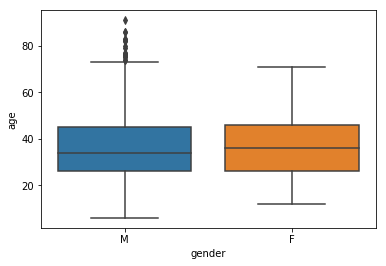

In [13]:
sns.boxplot(x = 'gender', y = 'age', data = df)

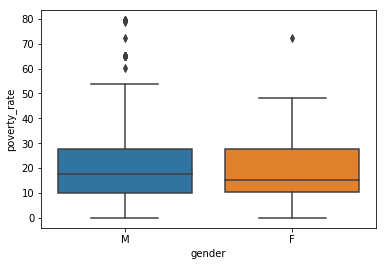

In [14]:
sns.boxplot(x = 'gender', y = 'poverty_rate', data = df)

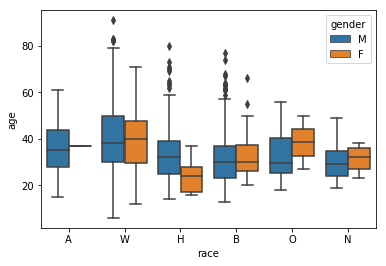

In [15]:
sns.boxplot(x="race", y="age", hue="gender", data=df);

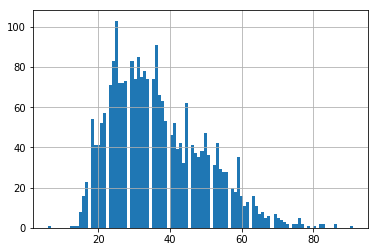

In [17]:
plt.figure()
df['age'].hist(bins = 100)

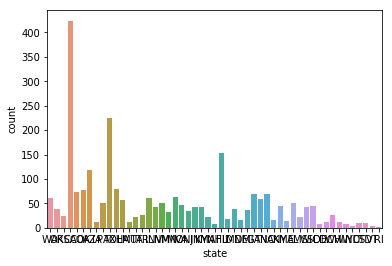

In [30]:
sns.countplot(x="state", data=df)

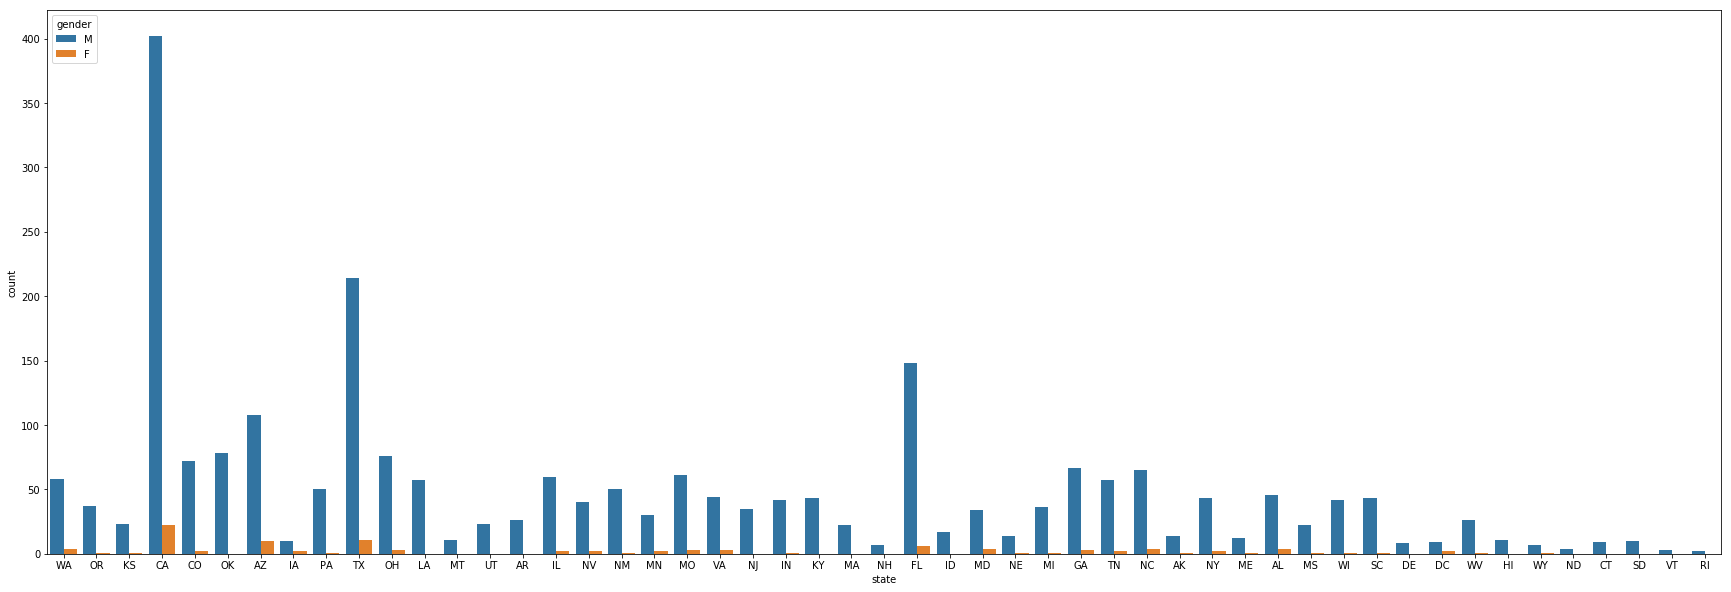

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x="state", hue="gender", data=df)

In [28]:
df_nona = df.dropna()

In [29]:
df_nona.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,flee,body_camera,median_income,poverty_rate,percent_completed_hs,share_of_city_white,share_of_city_black,share_of_city_native_american,share_of_city_asian,share_of_city_hispanic
id,,,,,,,,,,,,,,,,,,,,,
3,Tim Elliot,2/1/2015,shot,gun,53.0,M,A,Shelton,WA,True,...,Not fleeing,False,31750,31.1,64.1,97.9,0.0,1.1,0.5,1.1
4,Lewis Lee Lembke,2/1/2015,shot,gun,47.0,M,W,Aloha,OR,False,...,Not fleeing,False,42009,27.7,48.1,79.6,0.6,0.3,0.0,49.4
5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,...,Not fleeing,False,32500,17.2,79.2,96.4,0.0,0.0,0.6,6.0
8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,...,Not fleeing,False,31750,31.1,86.6,97.9,0.0,1.1,0.0,1.1
9,Michael Rodriguez,4/1/2015,shot,nail gun,39.0,M,H,Evans,CO,False,...,Not fleeing,False,39868,11.1,91.2,96.3,0.0,0.4,0.0,0.4


In [34]:
df_nona.loc[df['state'] == 'CA'].groupby(['race'])['race'].count().sort_values(ascending = False)

race
H    135
W    102
B     50
A     13
O      8
N      1
Name: race, dtype: int64

In [35]:
df_nona.loc[df['state'] == 'CA'].groupby(['city'])['city'].count().sort_values(ascending = False).head(5)

city
Los Angeles      30
San Francisco    11
Fresno           10
Long Beach        8
San Jose          7
Name: city, dtype: int64

In [37]:
df_num = df_nona.select_dtypes(include = ('int64','float64'))

In [38]:
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 3 to 2815
Data columns (total 21 columns):
name                             1921 non-null object
date                             1921 non-null object
manner_of_death                  1921 non-null object
armed                            1921 non-null object
age                              1921 non-null float64
gender                           1921 non-null object
race                             1921 non-null object
city                             1921 non-null object
state                            1921 non-null object
signs_of_mental_illness          1921 non-null bool
threat_level                     1921 non-null object
flee                             1921 non-null object
body_camera                      1921 non-null bool
median_income                    1921 non-null object
poverty_rate                     1921 non-null float64
percent_completed_hs             1921 non-null float64
share_of_city_white           

In [39]:
df_num[:5]

,age,poverty_rate,percent_completed_hs,share_of_city_white,share_of_city_black,share_of_city_native_american,share_of_city_asian,share_of_city_hispanic
id,,,,,,,,
3,53.0,31.1,64.1,97.9,0.0,1.1,0.5,1.1
4,47.0,27.7,48.1,79.6,0.6,0.3,0.0,49.4
5,23.0,17.2,79.2,96.4,0.0,0.0,0.6,6.0
8,32.0,31.1,86.6,97.9,0.0,1.1,0.0,1.1
9,39.0,11.1,91.2,96.3,0.0,0.4,0.0,0.4


In [40]:
corr_df_num = df_num.corr()

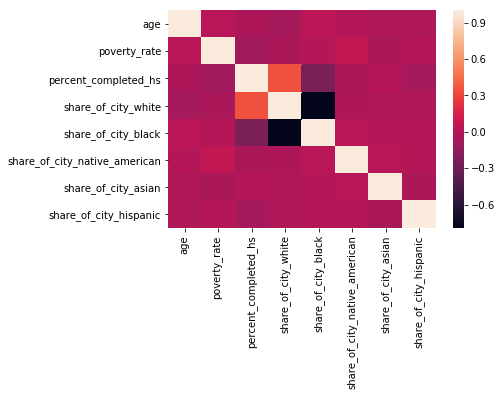

In [41]:
plt.figure()
sns.heatmap(corr_df_num)